# Load the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\karri\Downloads\student\student-mat.csv', delimiter=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# DataExploration

In [4]:
print("Missing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nDataset Shape:", df.shape)

Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher  

# Data Cleaning

In [5]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]
print("Duplicate Rows Removed:", initial_rows - final_rows)

Duplicate Rows Removed: 0


# DATA ANALYSIS QUESTIONS

In [6]:
avg_g3 = df['G3'].mean()
print("Average Final Grade (G3):", round(avg_g3, 2))
above_15 = df[df['G3'] > 15].shape[0]
print("Students with G3 > 15:", above_15)
correlation = df['studytime'].corr(df['G3'])
print("Correlation between study time and G3:", round(correlation, 2))
gender_avg = df.groupby('sex')['G3'].mean()
print("\nAverage G3 by Gender:\n", gender_avg)

Average Final Grade (G3): 10.42
Students with G3 > 15: 40
Correlation between study time and G3: 0.1

Average G3 by Gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


# Data Visualization

HISTOGRAM

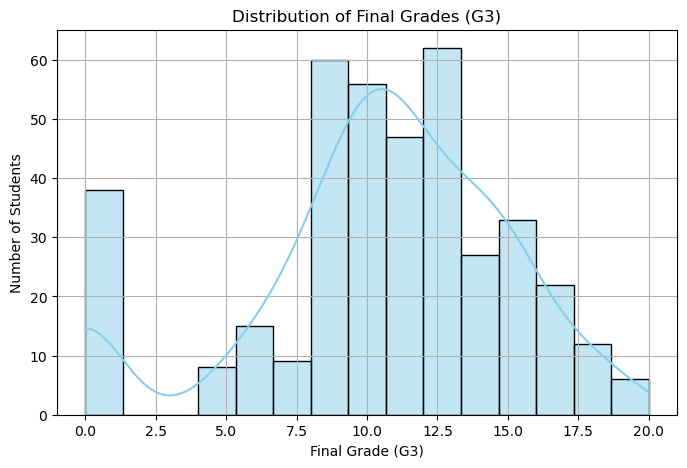

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

SCATTER PLOT

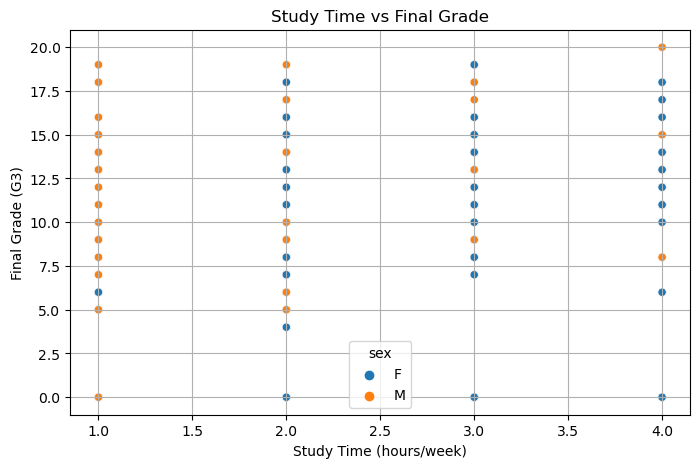

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='studytime', y='G3', hue='sex')
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time (hours/week)')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()

BAR CHART

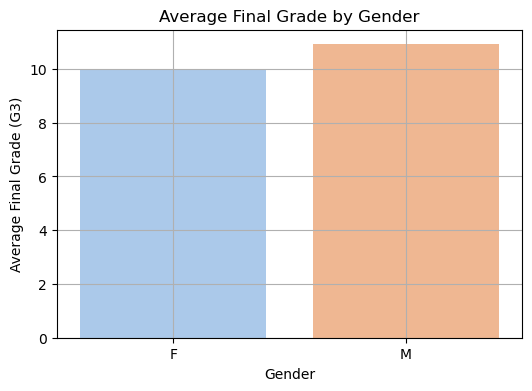

In [9]:
avg_by_gender = df.groupby('sex')['G3'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_by_gender, x='sex', y='G3', palette='pastel')
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.grid(True)
plt.show()